##**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##**Fetching data**

In [ ]:
df = pd.read_csv("Tweets.csv")

#***------EDA------***

##**Analyzing the tweets dataset**

In [ ]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [ ]:
df.dropna(axis = 0 , how ="any" , inplace = True)

In [ ]:
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
df.shape

(27480, 4)

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.tail()

,textID,text,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


Let's check the label of text

In [ ]:
tweet1 , tweet2 = df["text"][78] , df["text"][90]
print(tweet1 , "\n" , tweet2)

I am sooo tired 
  SWEEEEET - San Fran is awesome!!!!  Love it there


In [ ]:
label1 , label2 = df["sentiment"][78] , df["sentiment"][90]
print(label1 ,"\n", label2)

negative 
 positive


In [ ]:
df[df.sentiment=="negative"].describe()

,textID,text,selected_text,sentiment
count,7781,7781,7781,7781
unique,7781,7781,5861,1
top,549e992a42,Sooo SAD I will miss you here in San Diego!!!,miss,negative
freq,1,1,143,7781


In [ ]:
df[df.sentiment=="neutral"].describe()

,textID,text,selected_text,sentiment
count,11117,11117,11117,11117
unique,11117,11117,11111,1
top,cb774db0d1,"I`d have responded, if I were going",aw,neutral
freq,1,1,2,11117


In [ ]:
df[df.sentiment=="positive"].describe()

,textID,text,selected_text,sentiment
count,8582,8582,8582,8582
unique,8582,8582,5537,1
top,6e0c6d75b1,2am feedings for the baby are fun when he is a...,good,positive
freq,1,1,198,8582


##**Cleaning Data**

In [ ]:
grouping = df.groupby("sentiment").describe()

In [ ]:
grouping

textID                           text         \
           count unique         top freq  count unique   
sentiment                                                
negative    7781   7781  549e992a42    1   7781   7781   
neutral    11117  11117  cb774db0d1    1  11117  11117   
positive    8582   8582  6e0c6d75b1    1   8582   8582   

                                                                   \
                                                         top freq   
sentiment                                                           
negative       Sooo SAD I will miss you here in San Diego!!!    1   
neutral                  I`d have responded, if I were going    1   
positive   2am feedings for the baby are fun when he is a...    1   

          selected_text                    
                  count unique   top freq  
sentiment                                  
negative           7781   5861  miss  143  
neutral           11117  11111    aw    2  
positive           8582   5537  good  198

In [ ]:
grouping.selected_text.freq

sentiment
negative    143
neutral       2
positive    198
Name: freq, dtype: object

In [ ]:
# Adding a column of text length

df["text_len"] = df.selected_text.apply(len)
df.head()

,textID,text,selected_text,sentiment,text_len
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,35
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,8
2,088c60f138,my boss is bullying me...,bullying me,negative,11
3,9642c003ef,what interview! leave me alone,leave me alone,negative,14
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,13


##**Visualizing Data**

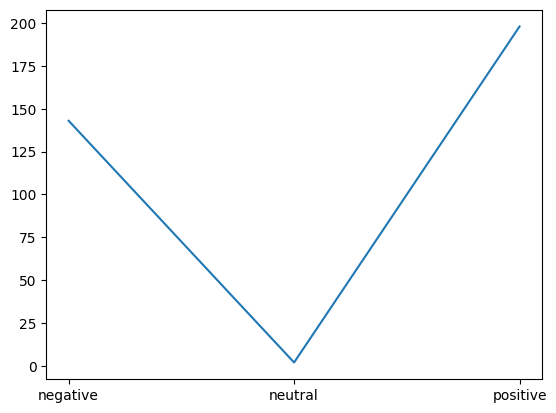

In [ ]:
plt.plot(grouping.selected_text.freq)

negative----0

neutral-----1

positive-----2

Text(0.5, 0, 'Message Length')

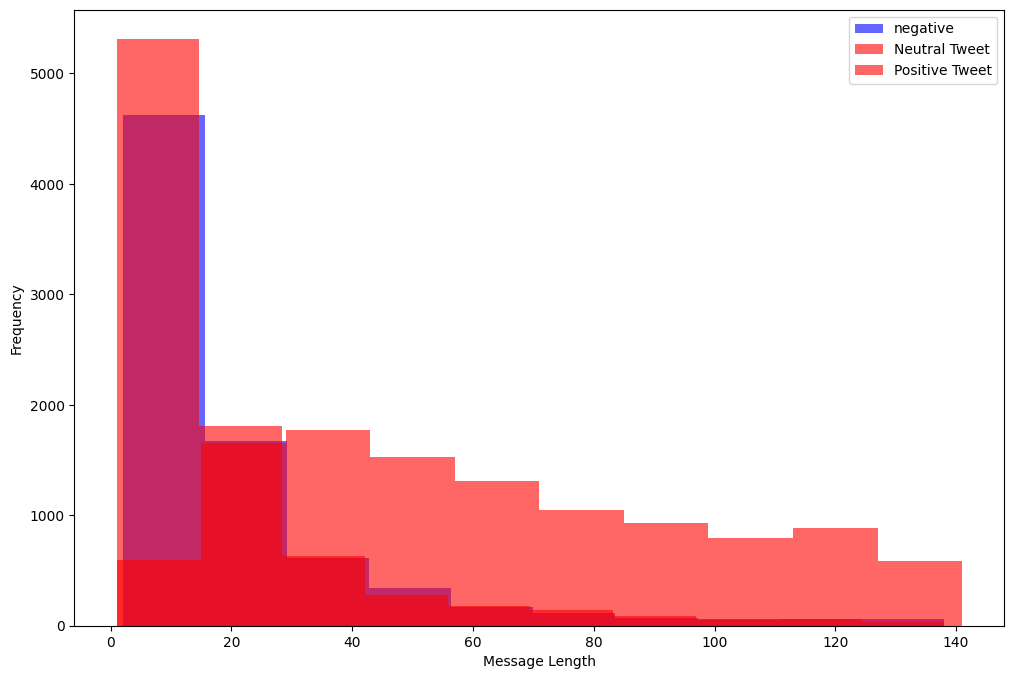

In [ ]:
# ploting histogram

plt.figure(figsize=(12, 8))

df[df.sentiment== "negative"].text_len.plot(bins=10, kind='hist', color='blue',
                                       label = "negative", alpha=0.6)
df[df.sentiment=="neutral"].text_len.plot(kind='hist', color='red',
                                       label='Neutral Tweet', alpha=0.6)
df[df.sentiment== "positive"].text_len.plot(kind='hist', color='red',
                                       label='Positive Tweet', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
plt.style.use('ggplot')

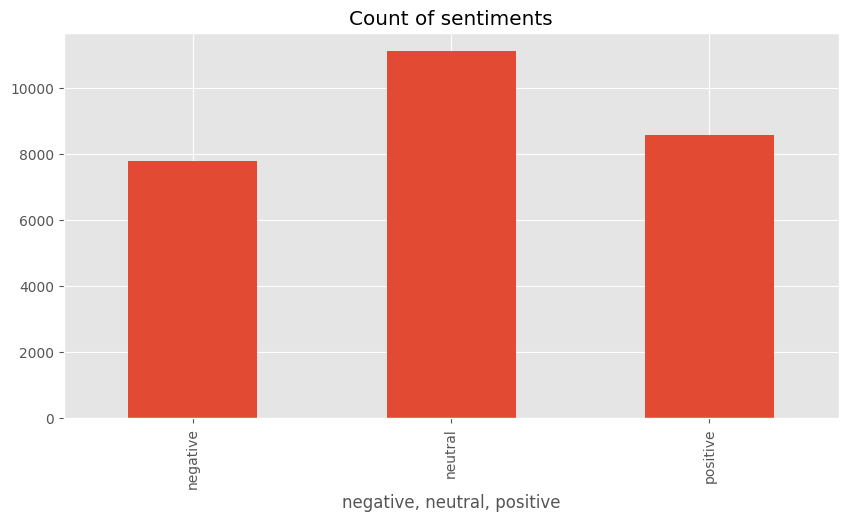

In [ ]:
ax = df['sentiment'].value_counts().sort_index().plot(kind='bar',
          title='Count of sentiments',
          figsize=(10, 5))
ax.set_xlabel('negative, neutral, positive')
plt.show()

##**NLTK  ----> Cleaning of data**

In [ ]:
import nltk
import string

In [ ]:
df.head()

,textID,text,selected_text,sentiment,text_len
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,35
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,8
2,088c60f138,my boss is bullying me...,bullying me,negative,11
3,9642c003ef,what interview! leave me alone,leave me alone,negative,14
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,13


In [ ]:
example = df["selected_text"][20]
print(example)

oh Marly, I`m so sorry!!  I hope you find her soon!! <3 <3


In [ ]:
label = df["sentiment"][20]     #tweet is neutral
label

'neutral'

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df["selected_text"]

0                      I`d have responded, if I were going
1                                                 Sooo SAD
2                                              bullying me
3                                           leave me alone
4                                            Sons of ****,
                               ...                        
27476                                               d lost
27477                                        , don`t force
27478                            Yay good for both of you.
27479                           But it was worth it  ****.
27480    All this flirting going on - The ATG smiles. Y...
Name: selected_text, Length: 27480, dtype: object

In [ ]:
df["selected_text"] = df["selected_text"].str.lower().str.split()

In [ ]:
df["selected_text"]

0              [i`d, have, responded,, if, i, were, going]
1                                              [sooo, sad]
2                                           [bullying, me]
3                                       [leave, me, alone]
4                                        [sons, of, ****,]
                               ...                        
27476                                            [d, lost]
27477                                    [,, don`t, force]
27478                     [yay, good, for, both, of, you.]
27479                     [but, it, was, worth, it, ****.]
27480    [all, this, flirting, going, on, -, the, atg, ...
Name: selected_text, Length: 27480, dtype: object

In [ ]:
df["selected_text"] = df["selected_text"].astype(str)
df["selected_text"].dtype

dtype('O')

In [ ]:
from nltk.corpus import stopwords
Stopwords = stopwords.words("english",('u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure' ))

df["selected_text"] = df["selected_text"].apply(lambda x:''.join([word for word in x.split() if word not in (Stopwords)]))

In [ ]:
df["selected_text"]

0        ['i`d','have','responded,','if','i','were','go...
1                                           ['sooo','sad']
2                                        ['bullying','me']
3                                   ['leave','me','alone']
4                                    ['sons','of','****,']
                               ...                        
27476                                         ['d','lost']
27477                                [',','don`t','force']
27478              ['yay','good','for','both','of','you.']
27479              ['but','it','was','worth','it','****.']
27480    ['all','this','flirting','going','on','-','the...
Name: selected_text, Length: 27480, dtype: object

##**VADER sentiment Scoring**

In [ ]:
df.head()

,textID,text,selected_text,sentiment,text_len
0,cb774db0d1,"I`d have responded, if I were going","['i`d','have','responded,','if','i','were','go...",neutral,35
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,"['sooo','sad']",negative,8
2,088c60f138,my boss is bullying me...,"['bullying','me']",negative,11
3,9642c003ef,what interview! leave me alone,"['leave','me','alone']",negative,14
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","['sons','of','****,']",negative,13


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

##**Evaluation of vaders model**

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia_result = sia.polarity_scores(example)

In [ ]:
from tqdm.notebook import tqdm
# Running the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["text"]
    myid = row["textID"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/27480 [00:00<?, ?it/s]

In [ ]:
res[myid]

{'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.8074}

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'textID'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,textID,neg,neu,pos,compound,text,selected_text,sentiment,text_len
0,cb774db0d1,0.000,1.000,0.0,0.0000,"I`d have responded, if I were going","['i`d','have','responded,','if','i','were','go...",neutral,35
1,549e992a42,0.474,0.526,0.0,-0.7437,Sooo SAD I will miss you here in San Diego!!!,"['sooo','sad']",negative,8
2,088c60f138,0.494,0.506,0.0,-0.5994,my boss is bullying me...,"['bullying','me']",negative,11
3,9642c003ef,0.538,0.462,0.0,-0.3595,what interview! leave me alone,"['leave','me','alone']",negative,14
4,358bd9e861,0.000,1.000,0.0,0.0000,"Sons of ****, why couldn`t they put them on t...","['sons','of','****,']",negative,13


In [ ]:
vaders.tail()

,textID,neg,neu,pos,compound,text,selected_text,sentiment,text_len
27475,4eac33d1c0,0.128,0.722,0.150,0.1027,wish we could come see u on Denver husband l...,"['d','lost']",negative,6
27476,4f4c4fc327,0.000,0.890,0.110,0.3818,I`ve wondered about rake to. The client has ...,"[',','don`t','force']",negative,13
27477,f67aae2310,0.000,0.572,0.428,0.9136,Yay good for both of you. Enjoy the break - y...,"['yay','good','for','both','of','you.']",positive,25
27478,ed167662a5,0.000,0.680,0.320,0.3291,But it was worth it ****.,"['but','it','was','worth','it','****.']",positive,26
27479,6f7127d9d7,0.000,0.458,0.542,0.8074,All this flirting going on - The ATG smiles...,"['all','this','flirting','going','on','-','the...",neutral,58


**Plot Vader results**

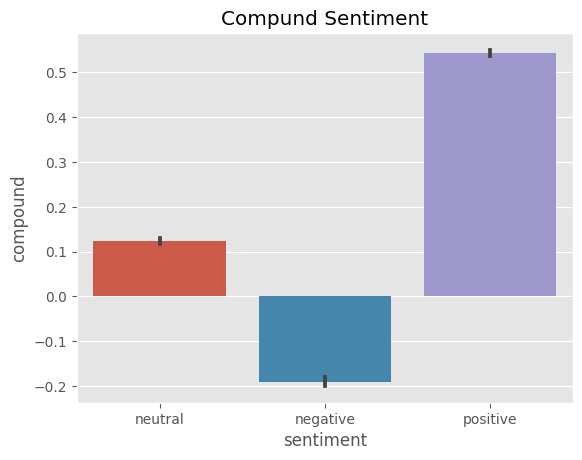

In [ ]:
ax = sns.barplot(data=vaders, x="sentiment", y="compound")
ax.set_title('Compund Sentiment')
plt.show()

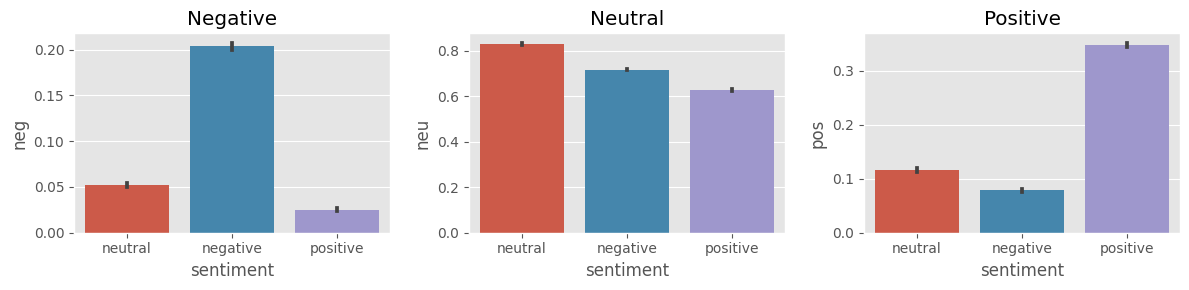

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot( data = vaders , x= "sentiment" , y="neg", ax=axs[0])
sns.barplot(data=vaders, x="sentiment", y='neu', ax=axs[1])
sns.barplot(data=vaders, x="sentiment", y='pos', ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.tight_layout()
plt.show()

##**This model is not giving accurate result. According to me, model need a better data set**

#**Roberta Pretrained Model**

It's deep learning model trained of a large corpus of data.

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [ ]:
e ="oh Marly, I`m so sorry!!  I hope you find her soon!! <3 <3"

In [ ]:
# checking Roberta model
encoded = tokenizer(e , return_tensors="pt")
output = model(**encoded)
output

score = output[0][0].detach().numpy()
score= softmax(score)

dict_score = {
    "roberta_neg": score[0],
    "roberta_neu": score[1],
    "roberta_pos": score[2]
}
dict_score


{'roberta_neg': 0.34892365,
 'roberta_neu': 0.4584758,
 'roberta_pos': 0.19260055}

##**Polarity Score Roberta**

In [ ]:
# fuction which will work for any text
def polarity_score(text):
  encoded = tokenizer(text , return_tensors="pt")
  output = model(**encoded)
  output

  score = output[0][0].detach().numpy()
  score= softmax(score)

  dict_score = {
      "roberta_neg": score[0],
      "roberta_neu": score[1],
      "roberta_pos": score[2]
  }
  return dict_score


#**Warning: Roberta has big data, execution will take time...Only try when you get good data frame or actual data from twitter api**

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row["text"]
        myid = row["textID"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_score(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')



  0%|          | 0/27480 [00:00<?, ?it/s]

**This cell's execution depends on the upper one**

In [ ]:
##Merging results with dataFrames
output_df = pd.DataFrame(res).T
output_df = output_df.reset_index().rename(columns={'index': 'textID'})
output_df = output_df.merge(df, how='left')

In [ ]:
output_df.head()

,textID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,text,selected_text,sentiment,text_len
0,cb774db0d1,0.000,1.000,0.0,0.0000,0.064939,0.808318,0.126744,"I`d have responded, if I were going","['i`d','have','responded,','if','i','were','go...",neutral,35
1,549e992a42,0.474,0.526,0.0,-0.7437,0.918158,0.066100,0.015742,Sooo SAD I will miss you here in San Diego!!!,"['sooo','sad']",negative,8
2,088c60f138,0.494,0.506,0.0,-0.5994,0.924613,0.070741,0.004646,my boss is bullying me...,"['bullying','me']",negative,11
3,9642c003ef,0.538,0.462,0.0,-0.3595,0.783082,0.192980,0.023938,what interview! leave me alone,"['leave','me','alone']",negative,14
4,358bd9e861,0.000,1.000,0.0,0.0000,0.564197,0.404575,0.031229,"Sons of ****, why couldn`t they put them on t...","['sons','of','****,']",negative,13


##**Testing Model**

In [ ]:
polarity_score("This person is doing the best they can with the tools they have” just as you were \
all those years when you allowed them to treat you poorly.\
 It’s just time to change.")

{'roberta_neg': 0.5290194, 'roberta_neu': 0.3872067, 'roberta_pos': 0.08377386}

In [ ]:
polarity_score("Why twitter api is not working, they want us to pay. But why??")

{'roberta_neg': 0.86677235,
 'roberta_neu': 0.124942474,
 'roberta_pos': 0.0082851825}

##**Comparing**

In [ ]:
sns.pairplot(data=output_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='sentiment',
            palette='tab10')
plt.show()

##**Vectorization**

In [ ]:
df = df.drop(["text"] , axis =1 , inplace = False )
df = df.drop(["textID"] , axis =1 , inplace = False)

##**Label Encoding**

In [ ]:
# label encoding all three natures of text

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["sentiment"] = lb.fit_transform(df["sentiment"])
df["sentiment"].head()

0    1
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [ ]:
df.head()

,selected_text,sentiment,text_len
0,"['i`d','have','responded,','if','i','were','go...",1,35
1,"['sooo','sad']",0,8
2,"['bullying','me']",0,11
3,"['leave','me','alone']",0,14
4,"['sons','of','****,']",0,13


In [ ]:
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x= df.selected_text
y = df.sentiment

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21984,)
(21984,)
(5496,)
(5496,)


In [ ]:
x_train.shape

(21984,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)
vect.fit(x_test)
x_train_d = vect.transform(x_train)
x_train_d = vect.fit_transform(x_train)

print(type(x_train_d), x_train_d.shape)

x_test_d = vect.transform(x_test)
print(type(x_test_d), x_test_d.shape)

<class 'scipy.sparse._csr.csr_matrix'> (21984, 15420)
<class 'scipy.sparse._csr.csr_matrix'> (5496, 15420)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train + x_test)  # Fit on both training and testing data

x_train_d = vect.transform(x_train)  # Transform the training data
x_test_d = vect.transform(x_test)    # Transform the testing data


ValueError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit_transform(x_train_d)

<21984x15420 sparse matrix of type '<class 'numpy.float64'>'
	with 139076 stored elements in Compressed Sparse Row format>

##**Naive Bayes**

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()


In [ ]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(x_train_d, y_train)

CPU times: user 7.01 ms, sys: 0 ns, total: 7.01 ms
Wall time: 7.11 ms


MultinomialNB()

##**Evatuation of naive bayes**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score
y_pred = nb.predict(x_test_d)

print("Accuracy Score: \n", accuracy_score(y_test , y_pred))

print("Confusion Matrix: \n" , confusion_matrix(y_test , y_pred))

Accuracy Score: 
 0.7856622998544396
Confusion Matrix: 
 [[ 948  547   67]
 [  64 2051   78]
 [  38  384 1319]]


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

# calculate accuracy of class predictions
print("Accuracy Score: \n" , accuracy_score(y_test, y_pred))
print("Confision Matrix: \n" , confusion_matrix(y_test , y_pred))


Accuracy Score: 
 0.7794759825327511
Confision Matrix: 
 [[ 880  633   49]
 [  34 2117   42]
 [  33  421 1287]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
example = ["I am so happy!! "]
vect.fit(example)
vects = vect.transform(example)
vects.shape

(1, 3)

In [ ]:
predict_nb = nb.predict(vect)
predict_nb

array([2])

##**Model has given accurate result**

#**Saving the model**

In [ ]:
import joblib
from joblib import dump
dump(nb , "model.joblib")

['model.joblib']

In [ ]:
dump(lb , "label.joblib")

['label.joblib']

In [ ]:
dump(vect , "vect.joblib")

['vect.joblib']

In [ ]:
dump (tfidf_transformer , "tfidf.joblib")

['tfidf.joblib']

#**Pipeline**

In [ ]:
from transformers import pipeline
send_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


#**Checking some text examples:**

In [ ]:
send_pipeline("I like sentiment analysis!")

[{'label': 'POSITIVE', 'score': 0.9985498785972595}]

In [ ]:
send_pipeline("It was a good day")

[{'label': 'POSITIVE', 'score': 0.9998730421066284}]

In [ ]:
send_pipeline("That’s dumb” means “I’m terrified of ever being wrong.\
 I’ve got some old shit about this even I’m not aware of. This is something my parents said to\
 me so I think things are black and white, right and wrong, and I feel very unsafe being wrong.")

[{'label': 'NEGATIVE', 'score': 0.9958111047744751}]

In [ ]:
/

[{'label': 'NEGATIVE', 'score': 0.9940359592437744}]

In [ ]:
send_pipeline(" Stand up for someone who's treated unfairly ")

[{'label': 'POSITIVE', 'score': 0.9771780967712402}]

In [ ]:
send_pipeline("Why twitter api is not working, they want us to pay. But why??")

[{'label': 'NEGATIVE', 'score': 0.9990637898445129}]